In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
df = pd.read_csv("/content/data_cluster_kmeans.csv")

In [4]:
df.head(5)

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Complain,Response,CustomerFor,Age,Total_Spent,Children,Is_Parent,Education,Living_With,cluster
0,58138,0,0,58,635,88,546,172,88,88,...,0,1,663,67,1617,0,0,0,1,3
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,113,70,27,2,1,0,1,1
2,71613,0,0,26,426,49,127,111,21,42,...,0,0,312,59,776,0,0,0,0,2
3,26646,1,0,26,11,4,20,10,3,5,...,0,0,139,40,53,1,1,0,0,1
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,161,43,422,1,1,1,0,0


In [5]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Complain,Response,CustomerFor,Age,Total_Spent,Children,Is_Parent,Education,Living_With,cluster
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,0.009042,0.150542,353.714286,55.086347,607.268083,0.947559,0.714286,0.609855,0.354430,1.358047
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,0.094678,0.357683,202.494886,11.701599,602.513364,0.749466,0.451856,0.682635,0.478449,1.035862
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,180.000000,47.000000,69.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,356.000000,54.000000,397.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,529.000000,65.000000,1048.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,699.000000,84.000000,2525.000000,3.000000,1.000000,2.000000,1.000000,3.000000


# Nhận xét chung

In [6]:
pal=sns.color_palette("Set2")


<ipython-input-7-43dc3cd820c1>:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  pl = sns.countplot(x=df["Total_Promos"],hue=df["cluster"], palette= pal)


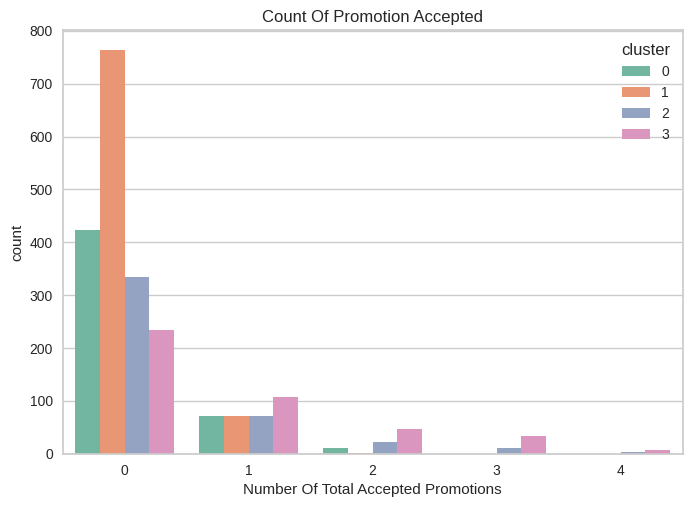

In [7]:
#Creating a feature to get a sum of accepted promotions
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

<ipython-input-8-289e0031ec38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x="cluster", data=df, palette=pal)
<ipython-input-8-289e0031ec38>:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  pl = sns.countplot(x="cluster", data=df, palette=pal)


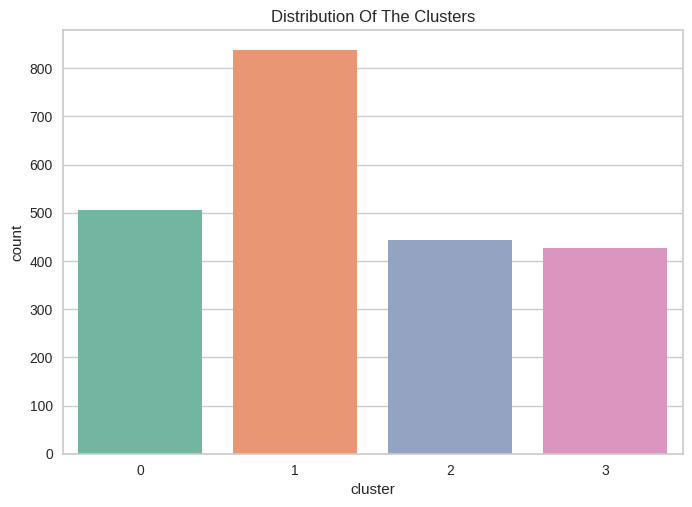

In [8]:
# xem thử xem sự phân bố của cụm trong dữ liệu
pl = sns.countplot(x="cluster", data=df, palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<ipython-input-9-234cd9698775>:1: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  pl = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["cluster"], palette= pal)


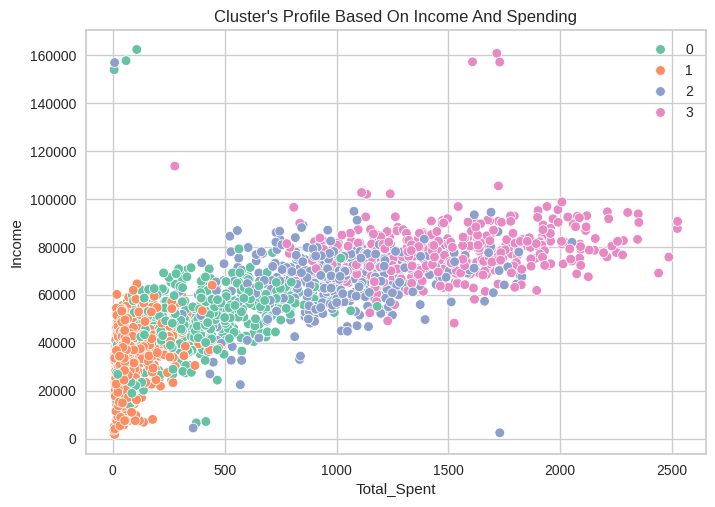

In [9]:
pl = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

- Cluster 0: Sẽ có thu nhập cao và chi tiền nhiều
- Cluster 1: Thu nhập thấp và chi tiền ít
- Cluster 2: Thu nhập cao và chi tiền ít
- cluster 3: Thu nhập trung bình chi tiền trung bình

<ipython-input-10-26dd5b724b22>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["cluster"], palette= pal)
<ipython-input-10-26dd5b724b22>:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["cluster"], palette= pal)


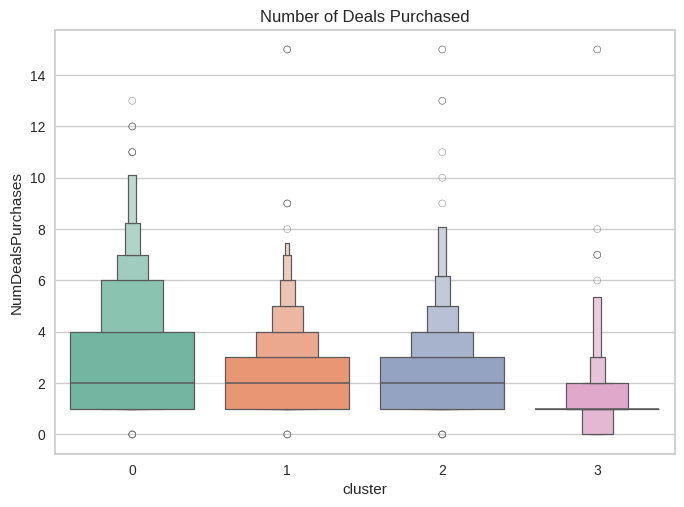

In [10]:
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["cluster"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-11-c3d95a08ae46>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(x=df["cluster"], y=df["Total_Spent"], palette=pal)
<ipython-input-11-c3d95a08ae46>:3: UserWarning: T

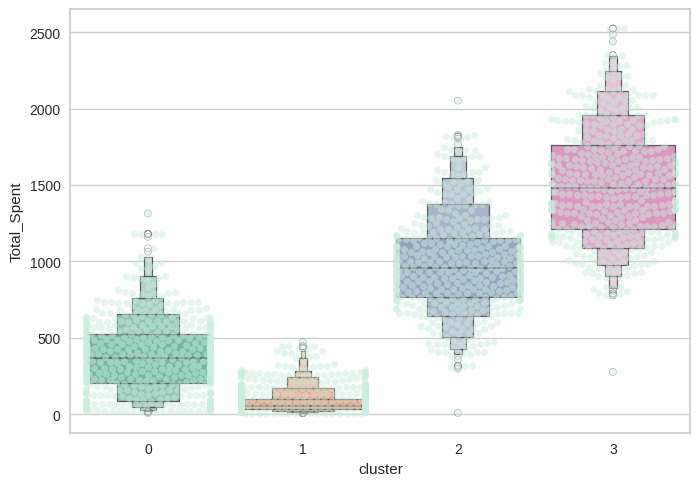

In [11]:
plt.figure()
pl=sns.swarmplot(x=df["cluster"], y=df["Total_Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["cluster"], y=df["Total_Spent"], palette=pal)
plt.show()

Nhìn vào đây ta thấy là nhóm 0 là nhóm khách hàng dành nhiều tiền cho chúng ta nhất

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

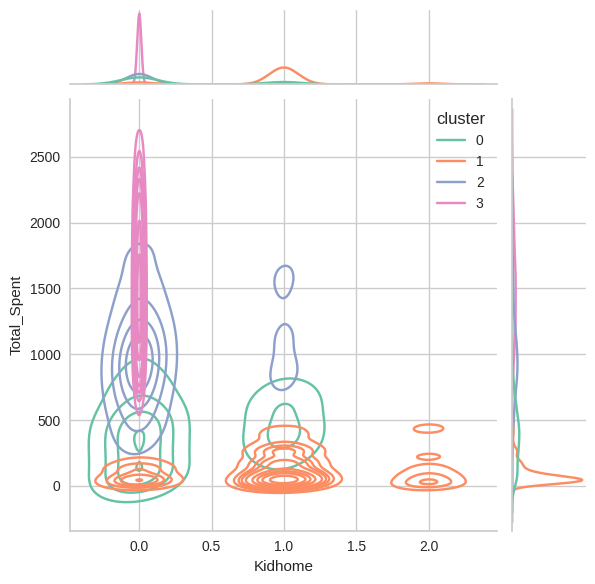

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

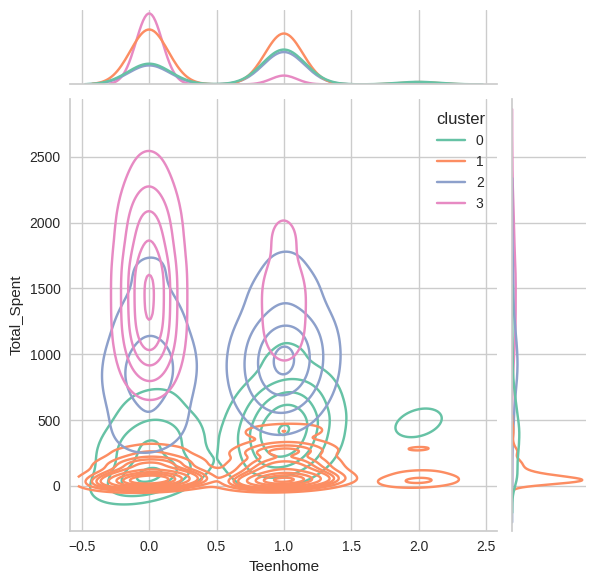

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

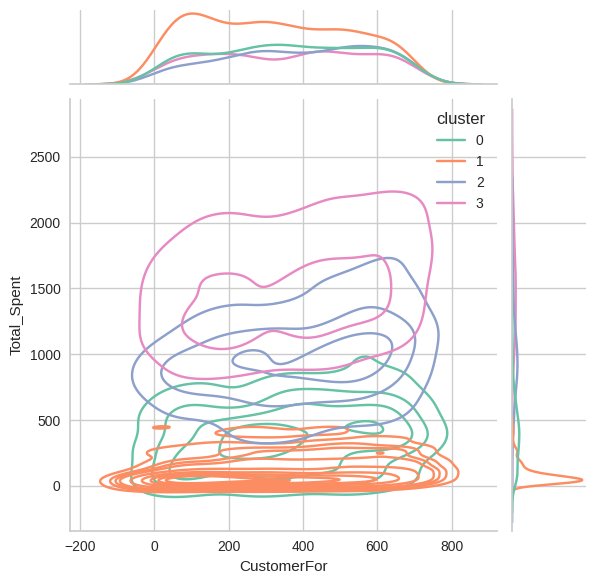

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

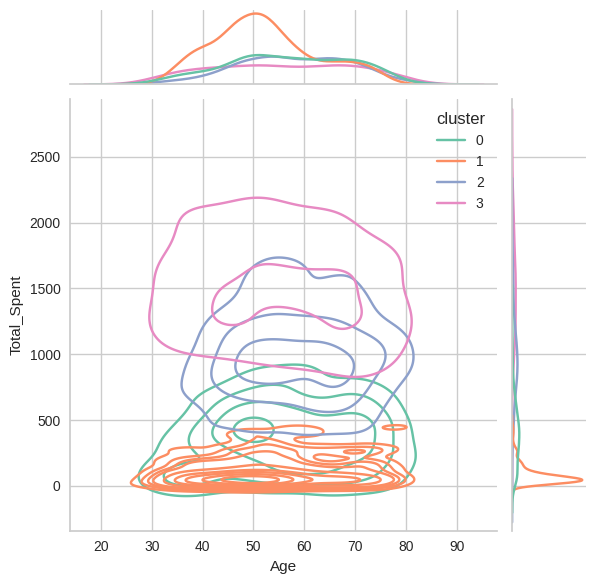

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

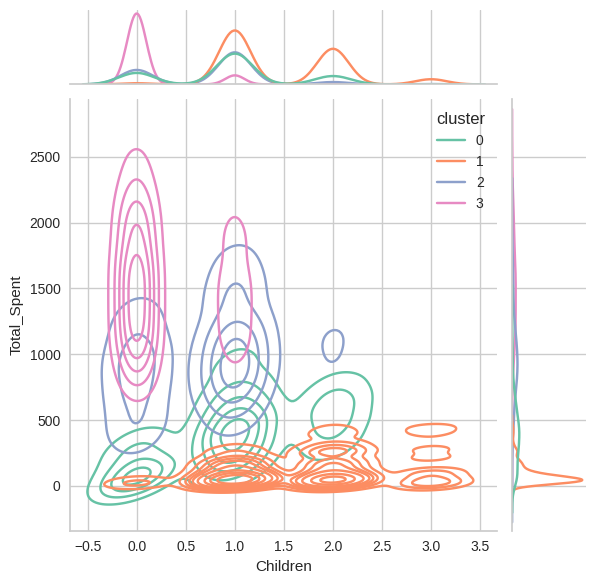

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

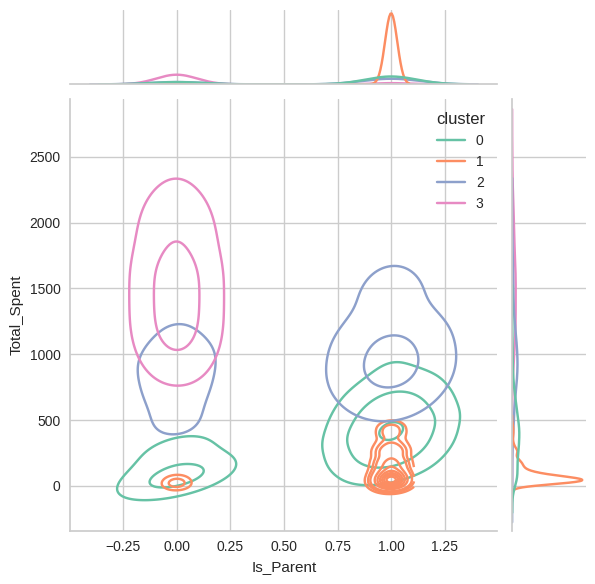

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

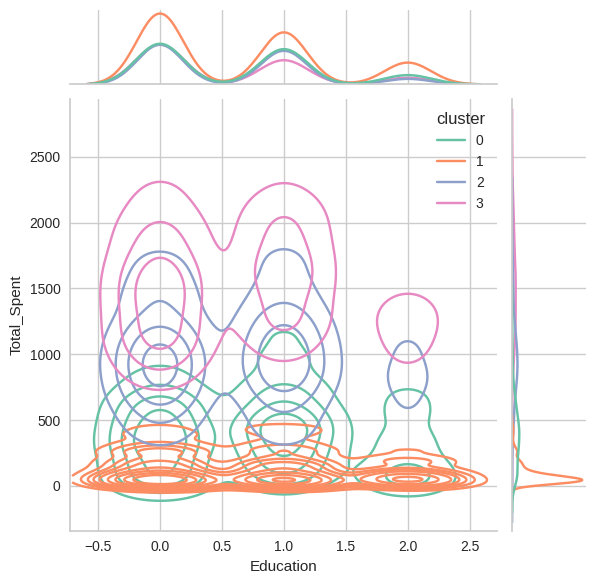

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

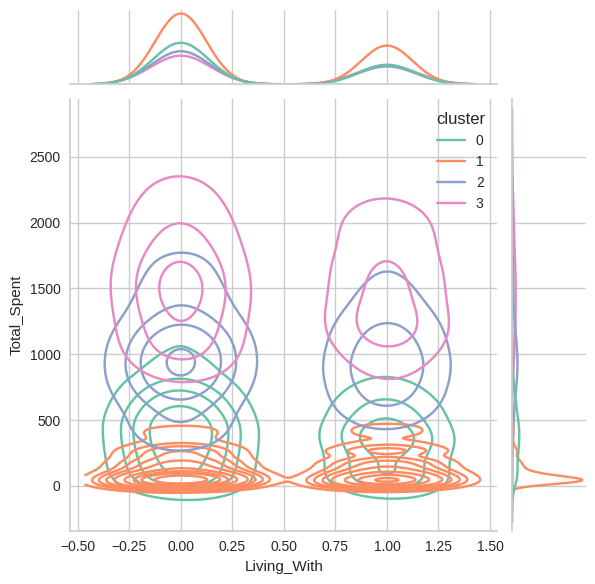

In [12]:
Personal = [ "Kidhome","Teenhome","CustomerFor", "Age", "Children", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Total_Spent"], hue =df["cluster"], kind="kde", palette=pal)
    plt.show()

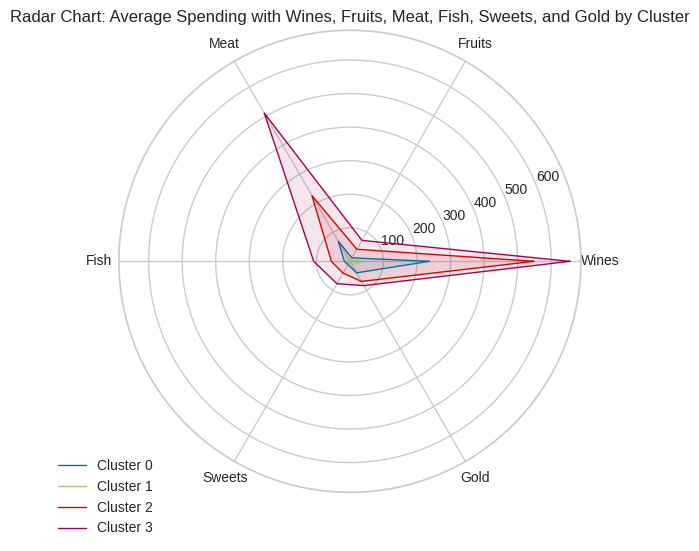

In [17]:
from math import pi
# Group by 'Clusters' and calculate the mean for ...
attributes = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
cluster_means = df.groupby('cluster')[attributes].mean().reset_index()

# Number of variables we're plotting.
num_vars = len(attributes)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["cluster"])}')
    ax.fill(angles, values, alpha=0.1)

# Labels for each attribute.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Add legend and title
plt.title('Radar Chart: Average Spending with Wines, Fruits, Meat, Fish, Sweets, and Gold by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

#Một số kết luận
##Nhóm 1 (cluster 0)
- Là nhóm những người chưa có con, có thể là độc thân hoặc gia đình không có con
- Trải dài ở độ tuổi trưởng thành (28 đến 80)
- Thuộc 2 trình độ học vấn: Chưa tốt nghiệp đại học hoặc đại học
- Là nhóm khách hàng chi tiêu cao
##Nhóm 2 (Cluster 1)
- Nhóm khách đã có con (0 đến 3), có thể là độc thân hoặc gia đình không có con
- Độ tuổi trải dài 29 đến 80 tuổi
- Là người chi tiêu thấp cho sản phẩm
- Trình độ học vấn trải dài từ chưa tốt nghiệp đến sau đại học
##Nhóm 3 (cluster 2)
- Nhóm khách có 0 đến 1 con, thường sống chung 1 người hoặc độc thân
- Độ tuổi từ 38 đến 90 tuổi
- Là người chi tiêu  cho sản phẩm trung bình
- Thuộc 2 trình độ học vấn: Chưa tốt nghiệp đại học hoặc đại học
##Nhóm 4 (cluster 3)
- Nhóm khách đa số là có 1 đến 2 con nhưng lại có thể sống chung 1 hoặc sống độc thân
- Có trình độ học vấn trải dài từ chưa tốt nghiệp đến sau đại học nhưng tập ở nhiều ở chưa tốt nghiệp và trình độ đại học
- Là người chi tiêu cho sản phẩm cao
- Đa số là người có trình độ đại học

==> Từ đó ta thấy nhóm khách hàng mang giá trị cao nhất là nhóm 1
==> Khách hàng sẽ sẵn sàng sử dụng sản phẩm là người độc thân, có 1 đến 2 và trình độ học vấn chưa tốt nghiệp hoặc đại học.